In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions

In [3]:
import re
import math
import pickle

In [4]:
df = pd.read_csv('data_files/2000이후 데이터.csv', index_col='날짜')

In [5]:
df = df[['S&P500', '미국채10년', 'GSCI', '기준금리']]

In [6]:
df

,S&P500,미국채10년,GSCI,기준금리
날짜,,,,
2022-05-04,4300.17,2.946,3958.5029,1.5
2022-05-03,4175.48,2.975,3837.0591,1.5
2022-05-02,4155.38,2.977,3903.0850,1.5
2022-04-29,4131.93,2.938,3882.9910,1.5
2022-04-28,4287.50,2.832,3884.4270,1.5
...,...,...,...,...
2000-01-07,1441.50,6.513,2689.9790,5.0
2000-01-06,1403.50,6.540,2713.8350,5.0
2000-01-05,1402.10,6.599,2714.8110,5.0


In [7]:
df_split = df.shift(-1)[253:-64]

In [8]:
df_shift1 = df.shift(-1)[253:-64]

In [9]:
df_shift90 = df.shift(-64)[253:-64] # 1월 3일 

In [10]:
df_change_90 = (df_shift1 - df_shift90)/df_shift90 * 100

In [11]:
df_change_90

,S&P500,미국채10년,GSCI,기준금리
날짜,,,,
2021-05-04,11.097391,48.192771,16.281368,0.0
2021-05-03,12.571347,51.820728,17.105960,0.0
2021-04-30,11.197450,55.988593,17.876970,0.0
2021-04-29,11.528566,59.032577,16.264624,0.0
2021-04-28,8.756708,57.308809,15.444055,0.0
...,...,...,...,...
2000-04-10,5.189039,-10.256410,11.199047,0.0
2000-04-07,6.968294,-9.434251,11.267855,0.0
2000-04-06,6.083732,-11.047128,11.846718,0.0


In [12]:
rate_li = df_split['기준금리']
len(rate_li)

5299

In [13]:
last_rate_li = []
for i in range(len(rate_li)):
    num = 0
    toggle = 0
    for j in range(len(rate_li[i:])):
#         print(rate_li[i], rate_li[i + j])
        if rate_li[i] != rate_li[i + j]:
            last_rate_li.append(rate_li[i + j])
            toggle = 1
            break
    print(toggle)
    if toggle == 0:
        last_rate_li.append(0)
        

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [14]:
last_rate_li

[0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,

In [15]:
len(rate_li)

5299

In [16]:
# with open('data_files/last_rate_li.pickle', 'wb') as fw:
#     pickle.dump(last_rate_li, fw)

In [17]:
with open('data_files/last_rate_li.pickle', 'rb') as fr:
    last_rate_li = pickle.load(fr)

In [18]:
np.nan

nan

In [19]:
for i in range(len(last_rate_li)):
    if last_rate_li[i] == 0:
        last_rate_li[i] = 4.75    

In [20]:
last_rate_li

[0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,

In [21]:
len(last_rate_li)

5299

In [22]:
df_change_90['기준금리'] = rate_li - last_rate_li

In [23]:
df_change_90

,S&P500,미국채10년,GSCI,기준금리
날짜,,,,
2021-05-04,11.097391,48.192771,16.281368,-0.25
2021-05-03,12.571347,51.820728,17.105960,-0.25
2021-04-30,11.197450,55.988593,17.876970,-0.25
2021-04-29,11.528566,59.032577,16.264624,-0.25
2021-04-28,8.756708,57.308809,15.444055,-0.25
...,...,...,...,...
2000-04-10,5.189039,-10.256410,11.199047,0.25
2000-04-07,6.968294,-9.434251,11.267855,0.25
2000-04-06,6.083732,-11.047128,11.846718,0.25


In [24]:
with open("data_files/max_ratio_dic.pickle","rb") as fr:
    max_ratio_dic = pickle.load(fr)
print(max_ratio_dic)

{'2021-05-04': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-05-03': (Decimal('0.1'), Decimal('0.1'), Decimal('0.5'), Decimal('0.3')), '2021-04-30': (Decimal('0.1'), Decimal('0.1'), Decimal('0.5'), Decimal('0.3')), '2021-04-29': (Decimal('0.1'), Decimal('0.1'), Decimal('0.5'), Decimal('0.3')), '2021-04-28': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-27': (Decimal('0.1'), Decimal('0.1'), Decimal('0.5'), Decimal('0.3')), '2021-04-26': (Decimal('0.1'), Decimal('0.1'), Decimal('0.5'), Decimal('0.3')), '2021-04-23': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-22': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-21': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-20': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-19': (Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1')), '2021-04-16': (Decimal('0.3'), Decimal(

In [25]:
len(list(max_ratio_dic.values())[:-64])

5299

In [26]:
df_change_90['비율'] = list(max_ratio_dic.values())[:-64]

In [27]:
df_change_90

,S&P500,미국채10년,GSCI,기준금리,비율
날짜,,,,,
2021-05-04,11.097391,48.192771,16.281368,-0.25,"(0.3, 0.1, 0.5, 0.1)"
2021-05-03,12.571347,51.820728,17.105960,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-30,11.197450,55.988593,17.876970,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-29,11.528566,59.032577,16.264624,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-28,8.756708,57.308809,15.444055,-0.25,"(0.3, 0.1, 0.5, 0.1)"
...,...,...,...,...,...
2000-04-10,5.189039,-10.256410,11.199047,0.25,"(0.1, 0.3, 0.5, 0.1)"
2000-04-07,6.968294,-9.434251,11.267855,0.25,"(0.1, 0.3, 0.5, 0.1)"
2000-04-06,6.083732,-11.047128,11.846718,0.25,"(0.1, 0.3, 0.5, 0.1)"


<AxesSubplot:xlabel='날짜'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)


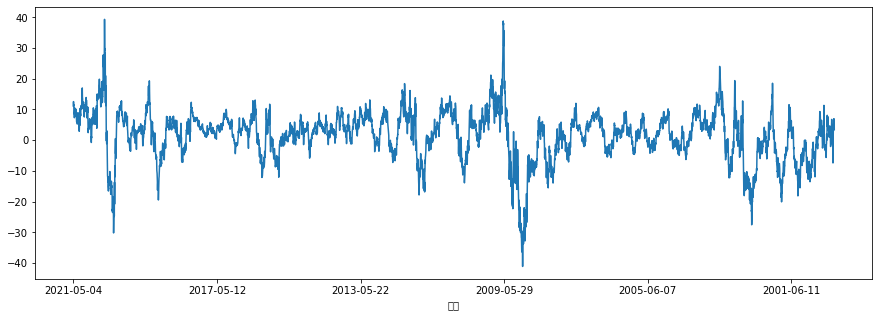

In [28]:
df_change_90['S&P500'].plot(figsize=(15,5))

In [29]:
df_change_90

,S&P500,미국채10년,GSCI,기준금리,비율
날짜,,,,,
2021-05-04,11.097391,48.192771,16.281368,-0.25,"(0.3, 0.1, 0.5, 0.1)"
2021-05-03,12.571347,51.820728,17.105960,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-30,11.197450,55.988593,17.876970,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-29,11.528566,59.032577,16.264624,-0.25,"(0.1, 0.1, 0.5, 0.3)"
2021-04-28,8.756708,57.308809,15.444055,-0.25,"(0.3, 0.1, 0.5, 0.1)"
...,...,...,...,...,...
2000-04-10,5.189039,-10.256410,11.199047,0.25,"(0.1, 0.3, 0.5, 0.1)"
2000-04-07,6.968294,-9.434251,11.267855,0.25,"(0.1, 0.3, 0.5, 0.1)"
2000-04-06,6.083732,-11.047128,11.846718,0.25,"(0.1, 0.3, 0.5, 0.1)"


In [30]:
df_change_90.to_csv('data_files/딥러닝 데이터.csv')

In [31]:
df = pd.read_csv('data_files/딥러닝 데이터.csv', index_col='날짜')

In [32]:
df

,S&P500,미국채10년,GSCI,기준금리,비율
날짜,,,,,
2021-05-04,11.097391,48.192771,16.281368,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
2021-05-03,12.571347,51.820728,17.105960,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-30,11.197450,55.988593,17.876970,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-29,11.528566,59.032577,16.264624,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-28,8.756708,57.308809,15.444055,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
...,...,...,...,...,...
2000-04-10,5.189039,-10.256410,11.199047,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
2000-04-07,6.968294,-9.434251,11.267855,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
2000-04-06,6.083732,-11.047128,11.846718,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."


In [33]:
x = df.drop('비율', axis=1)
y = df['비율']

In [34]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [36]:
x_train

,S&P500,미국채10년,GSCI,기준금리
날짜,,,,
2015-02-18,2.991669,-8.528785,-19.335845,-0.25
2005-05-09,-2.635079,4.433015,7.548851,-0.25
2013-05-24,8.901425,2.752294,-5.427981,-0.25
2006-08-22,2.808877,-4.500397,-0.340273,0.25
2005-02-18,1.599120,1.356261,-3.541932,-0.25
...,...,...,...,...
2018-08-17,4.432141,-7.865169,-6.952524,0.25
2004-09-16,-1.164432,-11.812024,4.292457,-0.25
2002-03-06,0.579201,5.279764,4.179709,-0.50


In [37]:
scaler = StandardScaler()

In [38]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [39]:
x_test_sc.shape

(1060, 4)

In [40]:
le = LabelEncoder()

In [41]:
y_train_en = le.fit_transform(y_train)
y_test_en = le.fit_transform(y_test)
y_en = le.fit_transform(y)

In [42]:
y_train_oh = to_categorical(y_train_en)
y_test_oh = to_categorical(y_test_en)
y_oh = to_categorical(y_en)

In [43]:
x_train_sc.shape

(4239, 4)

In [44]:
y_train_oh.shape

(4239, 10)

In [45]:
model = Sequential()
model.add(LSTM(100, input_shape = (4, 1), return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 100)            40800     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 100)               40100     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 81,910
Trainable params: 81,910
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [47]:
hist = model.fit(x_train, y_train_oh, batch_size=10, epochs=10, validation_data=(x_test, y_test_oh))

Epoch 1/10
424/424 [==============================] - 9s 5ms/step - loss: 1.8159 - accuracy: 0.3093 - val_loss: 1.6521 - val_accuracy: 0.3896
Epoch 2/10
424/424 [==============================] - 2s 4ms/step - loss: 1.6417 - accuracy: 0.3654 - val_loss: 1.5488 - val_accuracy: 0.3953
Epoch 3/10
424/424 [==============================] - 2s 4ms/step - loss: 1.5583 - accuracy: 0.3911 - val_loss: 1.5013 - val_accuracy: 0.4142
Epoch 4/10
424/424 [==============================] - 2s 4ms/step - loss: 1.4902 - accuracy: 0.4180 - val_loss: 1.4342 - val_accuracy: 0.4396
Epoch 5/10
424/424 [==============================] - 2s 4ms/step - loss: 1.4405 - accuracy: 0.4444 - val_loss: 1.4037 - val_accuracy: 0.4679
Epoch 6/10
424/424 [==============================] - 2s 4ms/step - loss: 1.3927 - accuracy: 0.4567 - val_loss: 1.4038 - val_accuracy: 0.4585
Epoch 7/10
424/424 [==============================] - 2s 4ms/step - loss: 1.3391 - accuracy: 0.4775 - val_loss: 1.3400 - val_accuracy: 0.4887
Epoch 

In [48]:
model.evaluate(x_test, y_test_oh)

34/34 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.5075


[1.2638959884643555, 0.50754714012146]

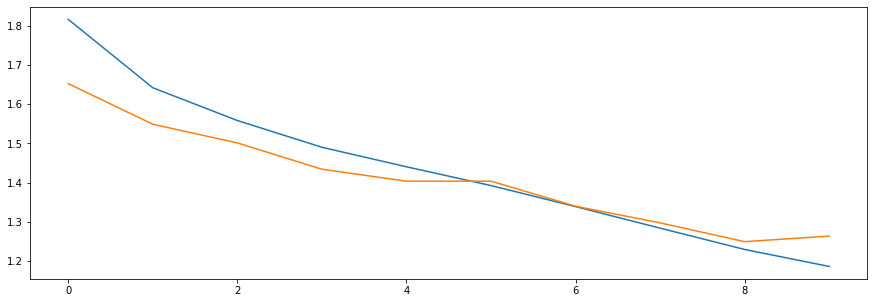

In [49]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

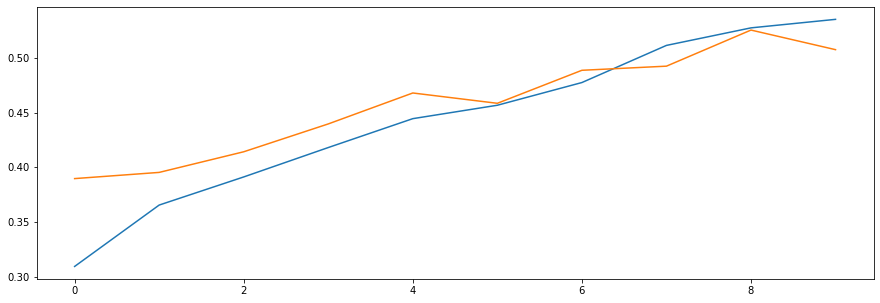

In [50]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [51]:
pred = model.predict(x_test)

In [52]:
pred

array([[1.2931550e-02, 2.2906996e-05, 7.5816689e-03, ..., 4.1214000e-02,
        1.4014658e-01, 1.7068736e-01],
       [2.6590837e-06, 1.2154401e-02, 1.8198662e-02, ..., 7.9832913e-04,
        3.5212832e-03, 9.2784739e-01],
       [5.4063124e-04, 1.7531252e-01, 8.2943209e-02, ..., 2.7715227e-01,
        3.0648254e-02, 6.9173925e-02],
       ...,
       [7.1821921e-02, 9.5805532e-04, 2.4524203e-04, ..., 3.1447268e-01,
        1.1575501e-02, 5.9782322e-02],
       [5.9416925e-05, 6.8304962e-07, 5.4179296e-02, ..., 1.6917411e-02,
        3.0487490e-01, 3.5398728e-01],
       [7.4179280e-03, 1.0102250e-01, 6.7446125e-03, ..., 4.2738346e-05,
        2.0594092e-01, 5.2146290e-05]], dtype=float32)

In [53]:
pred_li = []
for i in range(len(pred)):
    print(np.argmax(pred[i]))
    pred_li.append(np.argmax(pred[i]))

5
9
7
9
8
7
8
5
5
5
9
5
9
5
2
5
5
9
9
7
5
5
9
5
8
5
3
5
5
5
5
9
8
1
8
5
5
2
5
5
5
1
5
7
5
5
1
5
9
9
3
5
7
2
9
2
9
9
1
5
3
5
5
3
7
5
5
3
8
3
5
5
9
5
2
5
5
5
9
3
9
1
5
5
5
9
5
5
9
9
9
1
3
5
1
5
9
5
9
9
5
5
8
1
9
7
9
3
5
9
5
7
5
5
3
9
9
5
9
5
9
7
9
3
5
9
5
9
7
5
5
3
5
9
7
9
1
7
7
7
5
2
3
9
1
5
9
9
3
5
9
5
2
7
5
5
8
5
3
2
5
9
9
2
9
2
1
2
5
7
2
1
1
5
3
5
5
5
5
9
5
5
5
9
5
8
5
3
5
7
9
9
5
9
5
9
3
8
8
9
8
9
5
1
9
5
5
7
5
5
5
2
5
5
2
3
9
5
9
5
9
2
8
8
5
5
7
5
3
9
5
3
5
7
9
9
9
5
9
9
8
5
7
8
9
2
5
2
7
2
7
3
7
3
5
9
9
8
5
3
2
5
9
5
9
8
5
3
7
9
1
9
5
5
8
5
2
9
7
5
2
7
2
5
9
3
5
3
5
5
5
9
8
2
9
8
3
5
9
5
1
7
9
8
9
2
3
5
5
2
5
3
9
9
9
5
8
7
3
5
5
5
9
9
9
9
9
9
5
5
5
5
3
5
9
8
7
9
5
5
9
8
8
3
9
5
9
5
8
8
5
3
3
2
1
5
9
5
9
9
8
9
5
5
5
5
9
9
5
7
5
2
9
5
5
3
9
5
3
8
2
5
9
9
5
7
7
5
5
9
5
5
3
7
5
5
9
1
8
5
9
2
6
8
7
5
9
5
5
9
9
5
7
5
9
3
5
3
5
8
9
5
2
5
8
7
2
9
9
5
7
5
9
7
5
2
9
7
7
9
5
5
7
9
5
5
9
2
9
3
3
9
9
2
5
5
5
9
9
5
5
5
9
9
9
5
5
9
3
9
9
5
3
8
5
5
5
7
5
9
5
8
5
3
2
5
5
7
9
2
5
2
7
9
5
5
9
9
9
5


In [54]:
len(pred_li)

1060

In [55]:
inverse_pred_li = le.inverse_transform(pred_li)

In [56]:
inverse_pred_li

array(["(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1'))",
       "(Decimal('0.5'), Decimal('0.3'), Decimal('0.1'), Decimal('0.1'))",
       "(Decimal('0.5'), Decimal('0.1'), Decimal('0.1'), Decimal('0.3'))",
       ...,
       "(Decimal('0.5'), Decimal('0.1'), Decimal('0.1'), Decimal('0.3'))",
       "(Decimal('0.5'), Decimal('0.3'), Decimal('0.1'), Decimal('0.1'))",
       "(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'), Decimal('0.1'))"],
      dtype=object)

In [57]:
pred_df = pd.DataFrame(index=x_test.index, data=inverse_pred_li)

In [58]:
# pred_df.to_csv('data_files/예상 최적 비율.csv')

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test, inverse_pred_li)

0.5075471698113208

In [61]:
df = pd.read_csv('data_files/딥러닝 데이터.csv', index_col='날짜')

In [62]:
df_plus = pd.read_csv('data_files/딥러닝 데이터+.csv', index_col='날짜')

In [63]:
df_plus_sft90 = df_plus[['CPI', '달러인덱스']].shift(-63)[:-63]

In [64]:
df_plus_sft1 = df_plus[['CPI', '달러인덱스']].shift(-1)[:-63]

In [65]:
df_change_90 = ((df_plus_sft1 - df_plus_sft90) / df_plus_sft90) * 100

In [66]:
df_change_90

,CPI,달러인덱스
날짜,,
2022-03-01,2.700840,0.369532
2022-02-28,2.624638,0.535878
2022-02-25,2.618802,0.253943
2022-02-24,2.593371,-0.317118
2022-02-23,2.567931,-0.552080
...,...,...
2000-04-07,0.893860,4.666667
2000-04-06,0.901405,4.694040
2000-04-05,0.908952,4.797601


In [67]:
df.head()

,S&P500,미국채10년,GSCI,기준금리,비율
날짜,,,,,
2021-05-04,11.097391,48.192771,16.281368,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
2021-05-03,12.571347,51.820728,17.105960,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-30,11.197450,55.988593,17.876970,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-29,11.528566,59.032577,16.264624,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2021-04-28,8.756708,57.308809,15.444055,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."


In [68]:
df_plus.head()

,Unnamed: 0,S&P500,미국채10년,GSCI,기준금리,연도,CPI,quarter,q_gdp,last_gdp,last_unem,last_infl,달러인덱스
날짜,,,,,,,,,,,,,
2022-03-01,0,4306.26,1.716,3558.3401,1.25,2022,287.708000,2022-Q1,7.774645,5.7,3.9,7.0,97.406
2022-02-28,1,4373.79,1.822,3369.3010,1.25,2022,287.582071,2022-Q1,7.774645,5.7,3.9,7.0,96.694
2022-02-25,2,4384.62,1.970,3266.9109,1.25,2022,287.204286,2022-Q1,7.774645,5.7,3.9,7.0,96.619
2022-02-24,3,4288.70,1.970,3341.8611,1.25,2022,287.078357,2022-Q1,7.774645,5.7,3.9,7.0,97.118
2022-02-23,4,4225.50,1.998,3298.0601,1.25,2022,286.952429,2022-Q1,7.774645,5.7,3.9,7.0,96.188


In [69]:
last_df_plus = df_plus[['last_gdp', 'last_unem', 'last_infl']]

In [70]:
last_df_plus.reset_index(inplace=True)

In [71]:
df.reset_index(inplace=True)

In [72]:
last_df_plus

,날짜,last_gdp,last_unem,last_infl
0,2022-03-01,5.7,3.9,7.0
1,2022-02-28,5.7,3.9,7.0
2,2022-02-25,5.7,3.9,7.0
3,2022-02-24,5.7,3.9,7.0
4,2022-02-23,5.7,3.9,7.0
...,...,...,...,...
5564,2000-01-07,4.8,4.0,2.7
5565,2000-01-06,4.8,4.0,2.7
5566,2000-01-05,4.8,4.0,2.7
5567,2000-01-04,4.8,4.0,2.7


In [73]:
df.head()

,날짜,S&P500,미국채10년,GSCI,기준금리,비율
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."


In [74]:
df_merge = pd.merge(df, last_df_plus, how='inner', on='날짜')

In [75]:
df_merge

,날짜,S&P500,미국채10년,GSCI,기준금리,비율,last_gdp,last_unem,last_infl
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...",-3.4,6.7,1.4
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...",-3.4,6.7,1.4
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...",-3.4,6.7,1.4
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...",-3.4,6.7,1.4
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...",-3.4,6.7,1.4
...,...,...,...,...,...,...,...,...,...
5292,2000-04-10,5.189039,-10.256410,11.199047,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...",4.8,4.0,2.7
5293,2000-04-07,6.968294,-9.434251,11.267855,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...",4.8,4.0,2.7
5294,2000-04-06,6.083732,-11.047128,11.846718,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...",4.8,4.0,2.7
5295,2000-04-05,6.810061,-9.416833,9.839233,0.25,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...",4.8,4.0,2.7


In [76]:
df_change_90.reset_index(inplace=True)

In [77]:
df = pd.merge(df_merge, df_change_90, how='inner', on='날짜')

In [78]:
df.columns

Index(['날짜', 'S&P500', '미국채10년', 'GSCI', '기준금리', '비율', 'last_gdp', 'last_unem',
       'last_infl', 'CPI', '달러인덱스'],
      dtype='object')

In [79]:
df = df[['날짜', 'S&P500', '미국채10년', 'GSCI', '기준금리', 'last_gdp', 'last_unem',
       'last_infl', 'CPI', '달러인덱스', '비율']]

In [80]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
...,...,...,...,...,...,...,...,...,...,...,...
5292,2000-04-10,5.189039,-10.256410,11.199047,0.25,4.8,4.0,2.7,0.859437,5.067064,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5293,2000-04-07,6.968294,-9.434251,11.267855,0.25,4.8,4.0,2.7,0.893860,4.666667,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5294,2000-04-06,6.083732,-11.047128,11.846718,0.25,4.8,4.0,2.7,0.901405,4.694040,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5295,2000-04-05,6.810061,-9.416833,9.839233,0.25,4.8,4.0,2.7,0.908952,4.797601,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."


In [81]:
# df.to_csv('data_files/딥러닝 데이터_비율.csv')

In [82]:
df = pd.read_csv('data_files/딥러닝 데이터_비율.csv', index_col='Unnamed: 0')

In [83]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'..."
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'..."
...,...,...,...,...,...,...,...,...,...,...,...
5292,2000-04-10,5.189039,-10.256410,11.199047,0.25,4.8,4.0,2.7,0.859437,5.067064,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5293,2000-04-07,6.968294,-9.434251,11.267855,0.25,4.8,4.0,2.7,0.893860,4.666667,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5294,2000-04-06,6.083732,-11.047128,11.846718,0.25,4.8,4.0,2.7,0.901405,4.694040,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."
5295,2000-04-05,6.810061,-9.416833,9.839233,0.25,4.8,4.0,2.7,0.908952,4.797601,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'..."


In [84]:
df_sp = pd.read_csv('data_files/S&P500 데이터.csv', index_col='Unnamed: 0')

In [85]:
df_sp['날짜'] = df_sp['날짜'].apply(lambda x : '-'.join([j[:-1] for j in x.split()]))

In [86]:
df_sp.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2022-05-05,"4,152.38","4,255.50","4,256.39","4,105.51",-,-3.44%
1,2022-05-04,"4,300.17","4,181.18","4,307.66","4,148.91",-,2.99%
2,2022-05-03,"4,175.48","4,159.78","4,200.10","4,147.08",-,0.48%
3,2022-05-02,"4,155.38","4,130.61","4,169.81","4,062.51",-,0.57%
4,2022-04-29,"4,131.93","4,253.75","4,269.68","4,124.28",-,-3.63%


In [87]:
df_sp = df_sp[['날짜', '종가', '변동 %']]

In [88]:
df_sp['updown'] = df_sp['변동 %'].apply(lambda x: 1 if float(x[:-1]) > 0 else 0)

In [89]:
df = pd.merge(df, df_sp, how='inner', on='날짜')

In [90]:
df

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율,종가,변동 %,updown
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,164.66",-0.67%,0
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,192.66",0.27%,1
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,181.17",-0.72%,0
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,211.47",0.68%,1
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,183.18",-0.08%,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5292,2000-04-10,5.189039,-10.256410,11.199047,0.25,4.8,4.0,2.7,0.859437,5.067064,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...","1,504.50",-0.78%,0
5293,2000-04-07,6.968294,-9.434251,11.267855,0.25,4.8,4.0,2.7,0.893860,4.666667,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...","1,516.30",1.00%,1
5294,2000-04-06,6.083732,-11.047128,11.846718,0.25,4.8,4.0,2.7,0.901405,4.694040,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...","1,501.30",0.93%,1
5295,2000-04-05,6.810061,-9.416833,9.839233,0.25,4.8,4.0,2.7,0.908952,4.797601,"(Decimal('0.1'), Decimal('0.3'), Decimal('0.5'...","1,487.40",-0.49%,0


In [91]:
x = df.drop(['날짜', '비율', '종가', '변동 %', 'updown'], axis=1)
y = df['비율']

In [92]:
x_train, x_test = x[:round(len(x) * 0.8)], x[round(len(x) * 0.8):]
y_train, y_test = y[:round(len(y) * 0.8)], y[round(len(y) * 0.8):]

In [93]:
scaler = StandardScaler()

In [94]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [95]:
x_test_sc.shape

(1059, 9)

In [96]:
le = LabelEncoder()

In [97]:
y_en = le.fit_transform(y)
y_en

array([5, 0, 0, ..., 2, 2, 2])

In [98]:
y_oh = to_categorical(y_en)
y_train_oh, y_test_oh = y_oh[:round(len(y) * 0.8)], y_oh[round(len(y) * 0.8):]

In [99]:
x_train.shape

(4238, 9)

In [100]:
x_test.shape

(1059, 9)

In [101]:
y_train_oh.shape

(4238, 10)

In [102]:
y_test_oh.shape

(1059, 10)

In [103]:
model = Sequential()
model.add(LSTM(100, input_shape = (9, 1), return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 9, 100)            40800     
                                                                 
 flatten_1 (Flatten)         (None, 900)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               90100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 131,910
Trainable params: 131,910
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [105]:
hist = model.fit(x_train_sc, y_train_oh, batch_size=10, epochs=100, validation_data=(x_test_sc, y_test_oh))

Epoch 1/100
424/424 [==============================] - 3s 5ms/step - loss: 1.3727 - accuracy: 0.5090 - val_loss: 3.9670 - val_accuracy: 0.1180
Epoch 2/100
424/424 [==============================] - 2s 4ms/step - loss: 0.8032 - accuracy: 0.7187 - val_loss: 5.5260 - val_accuracy: 0.0982
Epoch 3/100
424/424 [==============================] - 2s 4ms/step - loss: 0.6064 - accuracy: 0.7857 - val_loss: 6.1735 - val_accuracy: 0.0944
Epoch 4/100
424/424 [==============================] - 2s 4ms/step - loss: 0.5182 - accuracy: 0.8025 - val_loss: 6.7171 - val_accuracy: 0.0982
Epoch 5/100
424/424 [==============================] - 2s 4ms/step - loss: 0.4634 - accuracy: 0.8270 - val_loss: 7.8450 - val_accuracy: 0.1020
Epoch 6/100
424/424 [==============================] - 2s 4ms/step - loss: 0.4335 - accuracy: 0.8395 - val_loss: 7.8698 - val_accuracy: 0.0925
Epoch 7/100
424/424 [==============================] - 2s 4ms/step - loss: 0.4087 - accuracy: 0.8443 - val_loss: 7.8089 - val_accuracy: 0.1029

Epoch 58/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1749 - accuracy: 0.9250 - val_loss: 11.3274 - val_accuracy: 0.1303
Epoch 59/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1788 - accuracy: 0.9259 - val_loss: 11.1101 - val_accuracy: 0.1228
Epoch 60/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1805 - accuracy: 0.9226 - val_loss: 11.4196 - val_accuracy: 0.1058
Epoch 61/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1808 - accuracy: 0.9245 - val_loss: 10.9496 - val_accuracy: 0.1586
Epoch 62/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1763 - accuracy: 0.9285 - val_loss: 11.7822 - val_accuracy: 0.1171
Epoch 63/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1731 - accuracy: 0.9276 - val_loss: 11.3671 - val_accuracy: 0.1558
Epoch 64/100
424/424 [==============================] - 2s 4ms/step - loss: 0.1664 - accuracy: 0.9254 - val_loss: 11.3278 - val_ac

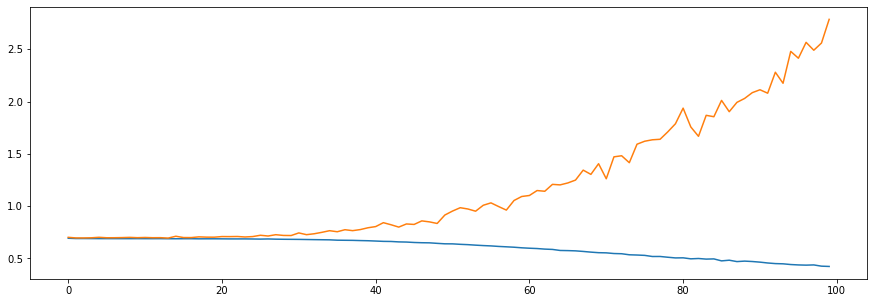

In [142]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

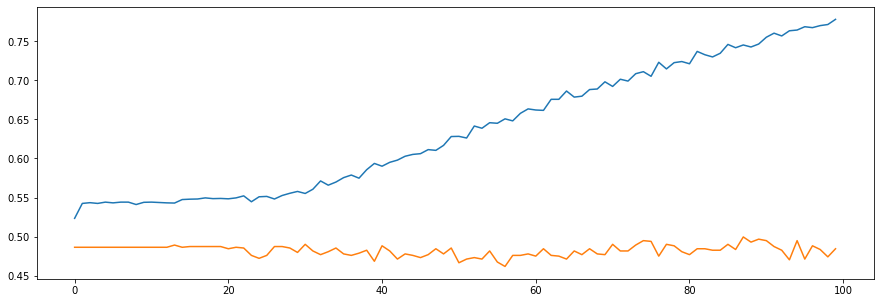

In [143]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [106]:
model.save('data_files/fn_model.h5')

In [107]:
hist.history

{'loss': [1.37265944480896,
  0.8031505346298218,
  0.6064120531082153,
  0.5181542634963989,
  0.46335554122924805,
  0.43345391750335693,
  0.4086800217628479,
  0.3903180658817291,
  0.3691556751728058,
  0.35092249512672424,
  0.34531497955322266,
  0.3355082869529724,
  0.32475385069847107,
  0.3268860876560211,
  0.3113939166069031,
  0.30012309551239014,
  0.3022942841053009,
  0.28968822956085205,
  0.29028454422950745,
  0.28248104453086853,
  0.2775948643684387,
  0.2691451609134674,
  0.2702236473560333,
  0.2600744068622589,
  0.2651323676109314,
  0.26947763562202454,
  0.251146137714386,
  0.25448179244995117,
  0.253776490688324,
  0.2461305856704712,
  0.24158529937267303,
  0.24605567753314972,
  0.23983027040958405,
  0.2337828427553177,
  0.23437325656414032,
  0.22724901139736176,
  0.22815939784049988,
  0.2209303230047226,
  0.2224959433078766,
  0.2203657031059265,
  0.21189826726913452,
  0.22080229222774506,
  0.21064148843288422,
  0.20919108390808105,
  0.203

In [108]:
with open('data_files/model_hist.pickle', 'wb') as fw:
    pickle.dump(hist.history, fw)

In [109]:
with open('data_files/model_hist.pickle', 'rb') as fr:
    data =  pickle.load(fr)

In [110]:
data

{'loss': [1.37265944480896,
  0.8031505346298218,
  0.6064120531082153,
  0.5181542634963989,
  0.46335554122924805,
  0.43345391750335693,
  0.4086800217628479,
  0.3903180658817291,
  0.3691556751728058,
  0.35092249512672424,
  0.34531497955322266,
  0.3355082869529724,
  0.32475385069847107,
  0.3268860876560211,
  0.3113939166069031,
  0.30012309551239014,
  0.3022942841053009,
  0.28968822956085205,
  0.29028454422950745,
  0.28248104453086853,
  0.2775948643684387,
  0.2691451609134674,
  0.2702236473560333,
  0.2600744068622589,
  0.2651323676109314,
  0.26947763562202454,
  0.251146137714386,
  0.25448179244995117,
  0.253776490688324,
  0.2461305856704712,
  0.24158529937267303,
  0.24605567753314972,
  0.23983027040958405,
  0.2337828427553177,
  0.23437325656414032,
  0.22724901139736176,
  0.22815939784049988,
  0.2209303230047226,
  0.2224959433078766,
  0.2203657031059265,
  0.21189826726913452,
  0.22080229222774506,
  0.21064148843288422,
  0.20919108390808105,
  0.203

In [111]:
df.head()

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율,종가,변동 %,updown
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,164.66",-0.67%,0
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,192.66",0.27%,1
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,181.17",-0.72%,0
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,211.47",0.68%,1
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,183.18",-0.08%,0


In [112]:
x = df.drop(['날짜', '비율', '종가', '변동 %', 'updown'], axis=1)
y = df['종가']

In [113]:
y = y.apply(lambda x: float(x.replace(',', '')))

In [114]:
x_train, x_test = x[:round(len(x) * 0.8)], x[round(len(x) * 0.8):]
y_train, y_test = y[:round(len(y) * 0.8)], y[round(len(y) * 0.8):]

In [115]:
scaler = StandardScaler()

In [116]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [117]:
x_test_sc.shape

(1059, 9)

In [118]:
x_train.shape

(4238, 9)

In [119]:
x_test.shape

(1059, 9)

In [120]:
y_train.shape

(4238,)

In [121]:
y_test.shape

(1059,)

In [122]:
x_train

,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스
0,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315
1,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265
2,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499
3,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573
4,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023
...,...,...,...,...,...,...,...,...,...
4233,0.239744,19.077404,5.287272,-0.25,2.8,5.7,1.9,0.907150,1.770821
4234,1.224490,17.633470,2.020768,-0.25,2.8,5.7,1.9,0.908804,1.193860
4235,1.220490,20.477903,2.195547,-0.25,2.8,5.7,1.9,0.910458,1.036269
4236,2.274163,23.455825,2.890369,-0.25,2.8,5.7,1.9,0.912112,0.033715


In [123]:
y_train

0       4164.66
1       4192.66
2       4181.17
3       4211.47
4       4183.18
         ...   
4233    1125.40
4234    1128.90
4235    1140.80
4236    1136.20
4237    1133.30
Name: 종가, Length: 4238, dtype: float64

In [124]:
model = Sequential()
model.add(LSTM(100, input_shape = (9, 1), return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 9, 100)            40800     
                                                                 
 flatten_2 (Flatten)         (None, 900)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               90100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131,921
Trainable params: 131,921
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [126]:
hist = model.fit(x_train_sc, y_train, batch_size=10, epochs=100, validation_data=(x_test_sc, y_test))

Epoch 1/100
424/424 [==============================] - 3s 5ms/step - loss: 1098006.0000 - val_loss: 545022.1250
Epoch 2/100
424/424 [==============================] - 2s 4ms/step - loss: 534869.8750 - val_loss: 473195.2188
Epoch 3/100
424/424 [==============================] - 2s 4ms/step - loss: 531751.5625 - val_loss: 545818.1250
Epoch 4/100
424/424 [==============================] - 2s 4ms/step - loss: 528852.4375 - val_loss: 654724.1875
Epoch 5/100
424/424 [==============================] - 2s 4ms/step - loss: 524155.3438 - val_loss: 574886.8125
Epoch 6/100
424/424 [==============================] - 2s 4ms/step - loss: 513886.2188 - val_loss: 575425.6250
Epoch 7/100
424/424 [==============================] - 2s 4ms/step - loss: 509288.1875 - val_loss: 544542.6875
Epoch 8/100
424/424 [==============================] - 2s 4ms/step - loss: 484183.8750 - val_loss: 452756.1562
Epoch 9/100
424/424 [==============================] - 2s 4ms/step - loss: 397278.6562 - val_loss: 327705.9688


424/424 [==============================] - 2s 4ms/step - loss: 1850.1503 - val_loss: 248716.7188
Epoch 76/100
424/424 [==============================] - 2s 4ms/step - loss: 1855.7578 - val_loss: 262280.5000
Epoch 77/100
424/424 [==============================] - 2s 4ms/step - loss: 1822.1632 - val_loss: 272749.8750
Epoch 78/100
424/424 [==============================] - 2s 4ms/step - loss: 1777.3778 - val_loss: 233279.1406
Epoch 79/100
424/424 [==============================] - 2s 4ms/step - loss: 1728.0273 - val_loss: 268021.3438
Epoch 80/100
424/424 [==============================] - 2s 4ms/step - loss: 2058.6353 - val_loss: 253277.6719
Epoch 81/100
424/424 [==============================] - 2s 4ms/step - loss: 1698.5990 - val_loss: 243907.7188
Epoch 82/100
424/424 [==============================] - 2s 4ms/step - loss: 1679.4449 - val_loss: 303660.9062
Epoch 83/100
424/424 [==============================] - 2s 4ms/step - loss: 1747.0803 - val_loss: 227453.4844
Epoch 84/100
424/424 [=

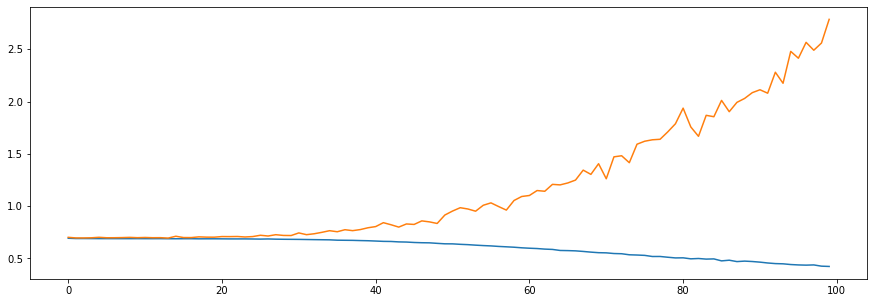

In [144]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

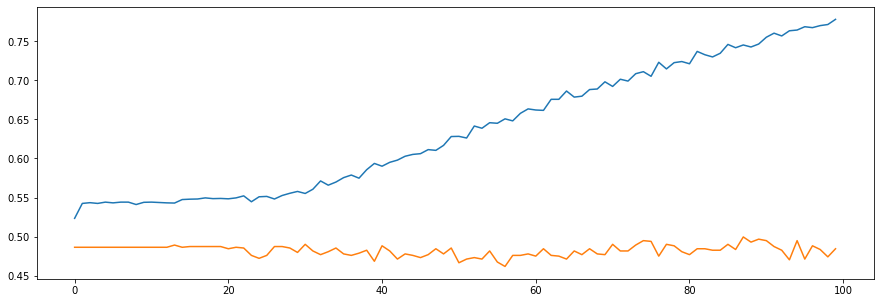

In [145]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [127]:
df.head()

,날짜,S&P500,미국채10년,GSCI,기준금리,last_gdp,last_unem,last_infl,CPI,달러인덱스,비율,종가,변동 %,updown
0,2021-05-04,11.097391,48.192771,16.281368,-0.25,-3.4,6.7,1.4,2.029159,-0.287315,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,164.66",-0.67%,0
1,2021-05-03,12.571347,51.820728,17.105960,-0.25,-3.4,6.7,1.4,1.971019,0.324265,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,192.66",0.27%,1
2,2021-04-30,11.197450,55.988593,17.876970,-0.25,-3.4,6.7,1.4,1.990275,0.026499,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,181.17",-0.72%,0
3,2021-04-29,11.528566,59.032577,16.264624,-0.25,-3.4,6.7,1.4,1.980892,0.183573,"(Decimal('0.1'), Decimal('0.1'), Decimal('0.5'...","4,211.47",0.68%,1
4,2021-04-28,8.756708,57.308809,15.444055,-0.25,-3.4,6.7,1.4,1.971506,0.278023,"(Decimal('0.3'), Decimal('0.1'), Decimal('0.5'...","4,183.18",-0.08%,0


In [128]:
x = df.drop(['날짜', '비율', '종가', '변동 %', 'updown'], axis=1)
y = df['updown']

In [129]:
x_train, x_test = x[:round(len(x) * 0.8)], x[round(len(x) * 0.8):]
y_train, y_test = y[:round(len(y) * 0.8)], y[round(len(y) * 0.8):]

In [130]:
scaler = StandardScaler()

In [131]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [132]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

In [133]:
x_test_sc.shape

(1059, 9)

In [134]:
x_train.shape

(4238, 9)

In [135]:
x_test.shape

(1059, 9)

In [136]:
y_train_oh.shape

(4238, 2)

In [137]:
y_test_oh.shape

(1059, 2)

In [138]:
y_train

0       0
1       1
2       0
3       1
4       0
       ..
4233    0
4234    0
4235    1
4236    1
4237    0
Name: updown, Length: 4238, dtype: int64

In [139]:
model = Sequential()
model.add(LSTM(100, input_shape = (9, 1), return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 9, 100)            40800     
                                                                 
 flatten_3 (Flatten)         (None, 900)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               115328    
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 2)                 66        
                                                                 
Total params: 166,530
Trainable params: 166,530
Non-tr

In [140]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [141]:
hist = model.fit(x_train, y_train_oh, batch_size=10, epochs=100, validation_data=(x_test, y_test_oh))

Epoch 1/100
424/424 [==============================] - 4s 6ms/step - loss: 0.6934 - accuracy: 0.5234 - val_loss: 0.7023 - val_accuracy: 0.4863
Epoch 2/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6906 - accuracy: 0.5425 - val_loss: 0.6965 - val_accuracy: 0.4863
Epoch 3/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6906 - accuracy: 0.5434 - val_loss: 0.6964 - val_accuracy: 0.4863
Epoch 4/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6903 - accuracy: 0.5425 - val_loss: 0.6978 - val_accuracy: 0.4863
Epoch 5/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6899 - accuracy: 0.5441 - val_loss: 0.7025 - val_accuracy: 0.4863
Epoch 6/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6898 - accuracy: 0.5432 - val_loss: 0.6981 - val_accuracy: 0.4863
Epoch 7/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6896 - accuracy: 0.5441 - val_loss: 0.6984 - val_accuracy: 0.4863

Epoch 58/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6116 - accuracy: 0.6482 - val_loss: 0.9626 - val_accuracy: 0.4759
Epoch 59/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6077 - accuracy: 0.6579 - val_loss: 1.0544 - val_accuracy: 0.4759
Epoch 60/100
424/424 [==============================] - 2s 5ms/step - loss: 0.6021 - accuracy: 0.6635 - val_loss: 1.0926 - val_accuracy: 0.4778
Epoch 61/100
424/424 [==============================] - 2s 5ms/step - loss: 0.5981 - accuracy: 0.6621 - val_loss: 1.1022 - val_accuracy: 0.4750
Epoch 62/100
424/424 [==============================] - 2s 5ms/step - loss: 0.5950 - accuracy: 0.6616 - val_loss: 1.1495 - val_accuracy: 0.4844
Epoch 63/100
424/424 [==============================] - 2s 5ms/step - loss: 0.5896 - accuracy: 0.6758 - val_loss: 1.1426 - val_accuracy: 0.4759
Epoch 64/100
424/424 [==============================] - 2s 5ms/step - loss: 0.5866 - accuracy: 0.6758 - val_loss: 1.2085 - val_accuracy:

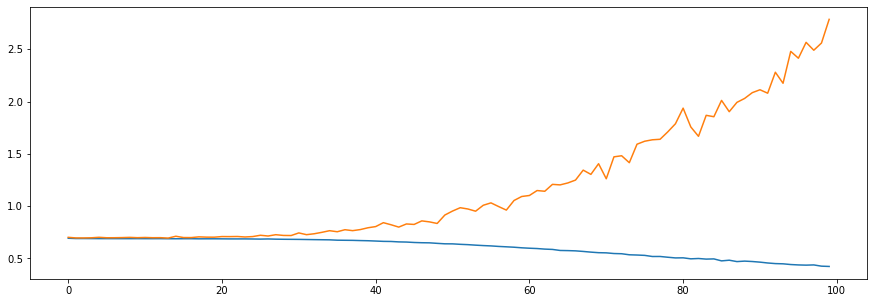

In [146]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

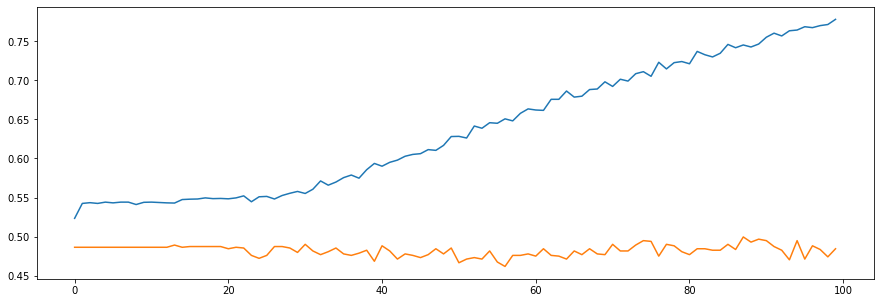

In [147]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [358]:
df = pd.read_csv('data_files/딥러닝 데이터_비율.csv', index_col='Unnamed: 0')

In [359]:
df.set_index('날짜', inplace=True)

In [360]:
df = df[::-1]

<AxesSubplot:xlabel='날짜'>

C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\bitcamp\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45380 mi

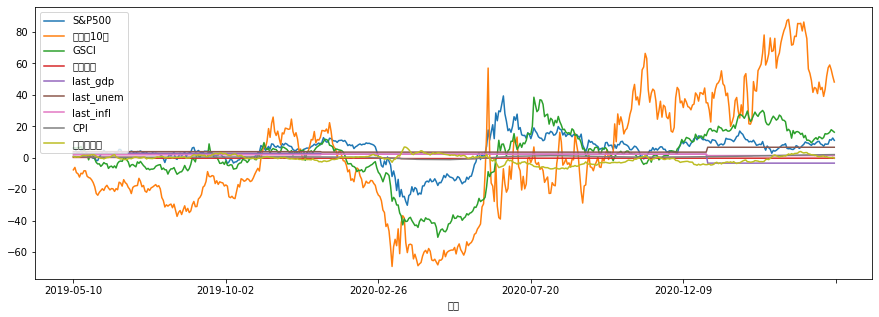

In [361]:
df.drop('비율', axis=1)[-500:].plot(figsize=(15,5))

In [501]:
df = pd.read_csv('data_files/sp_dol_fed 1971~.csv', index_col='Unnamed: 0')

In [502]:
df.set_index('date', drop=True, inplace=True)

In [503]:
df.sp = df.sp.apply(lambda x: x.replace(',', ''))

In [504]:
df = df[::-1]

In [505]:
df_sc.isna().sum()

sp        0
doller    0
fed       0
dtype: int64

In [506]:
df_sc = scaler.fit_transform(df)

In [507]:
df_sc = pd.DataFrame(df_sc)

In [508]:
df_sc.columns = df.columns

In [509]:
df_sc.index = df.index

<AxesSubplot:xlabel='date'>

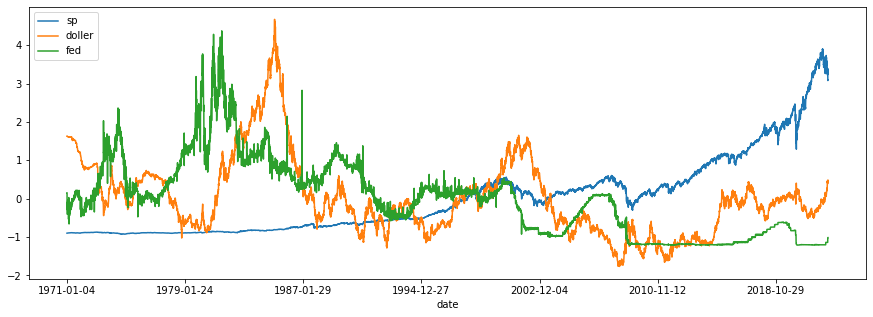

In [510]:
df_sc.plot(figsize=(15, 5))

In [511]:
df.sp = df.sp.astype('float')

In [512]:
df_rate = ((df.shift(1) - df.shift(2)) / df.shift(1)) * 100

In [513]:
df_rate

,sp,doller,fed
date,,,
1971-01-04,NaN,NaN,NaN
1971-01-05,NaN,NaN,NaN
1971-01-06,0.708061,-0.008299,0.000000
1971-01-07,0.595560,-0.024898,-46.666667
1971-01-08,0.032475,0.049776,16.666667
...,...,...,...
2022-05-04,0.481382,-0.260942,0.000000
2022-05-05,2.899653,-0.857788,0.000000
2022-05-06,-3.696764,1.118076,60.240964


In [514]:
rate_li = df['fed'][::-1]

In [515]:
last_rate_li = []
for i in range(len(rate_li)):
    num = 0
    toggle = 0
    for j in range(len(rate_li[i:])):
#         print(rate_li[i], rate_li[i + j])
        if rate_li[i] != rate_li[i + j]:
            last_rate_li.append(rate_li[i + j])
            toggle = 1
            break
    print(toggle)
    if toggle == 0:
        last_rate_li.append(0)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [516]:
last_rate_li[::-1]

[0,
 0,
 5.5,
 3.75,
 3.75,
 4.5,
 4.38,
 4.25,
 3.25,
 4.13,
 4.0,
 3.88,
 4.13,
 4.75,
 4.63,
 4.25,
 4.13,
 3.88,
 3.88,
 4.25,
 4.0,
 4.38,
 4.25,
 3.75,
 4.25,
 3.88,
 3.5,
 2.75,
 3.0,
 3.0,
 4.0,
 5.0,
 4.13,
 3.88,
 3.25,
 3.0,
 2.25,
 3.25,
 3.38,
 3.38,
 3.63,
 3.25,
 3.5,
 3.25,
 3.25,
 3.13,
 3.13,
 3.5,
 3.5,
 4.13,
 4.0,
 3.5,
 4.13,
 3.75,
 3.75,
 3.38,
 3.38,
 3.38,
 3.75,
 4.13,
 4.13,
 4.5,
 4.0,
 3.88,
 4.0,
 4.25,
 4.0,
 4.13,
 4.25,
 4.5,
 3.75,
 4.38,
 4.38,
 4.25,
 4.13,
 4.38,
 4.25,
 4.13,
 4.13,
 4.0,
 4.38,
 4.38,
 4.25,
 4.38,
 4.63,
 4.88,
 4.75,
 4.63,
 4.63,
 4.63,
 4.63,
 4.5,
 4.38,
 4.63,
 4.88,
 4.88,
 4.75,
 4.63,
 4.63,
 4.75,
 4.63,
 4.63,
 4.88,
 4.75,
 4.63,
 4.63,
 4.63,
 4.63,
 4.75,
 4.88,
 4.75,
 4.88,
 4.88,
 5.0,
 5.0,
 5.0,
 4.88,
 5.13,
 5.25,
 4.88,
 4.88,
 4.88,
 4.88,
 5.13,
 4.75,
 4.75,
 5.25,
 5.13,
 4.88,
 5.25,
 5.25,
 5.13,
 5.0,
 5.13,
 5.25,
 5.5,
 5.63,
 5.38,
 5.38,
 5.5,
 5.38,
 5.25,
 5.25,
 5.38,
 5.38,
 5.5,
 5.5,
 5.63,


In [517]:
for i in last_rate_li:
    if i == 0:
        print(i)

0
0


In [518]:
df_rate['fed'] = last_rate_li[::-1]

In [526]:
df

,sp,doller,fed
date,,,
1971-01-04,91.15,120.529999,5.50
1971-01-05,91.80,120.519997,5.50
1971-01-06,92.35,120.489998,3.75
1971-01-07,92.38,120.550003,4.50
1971-01-08,92.19,120.529999,4.50
...,...,...,...
2022-05-04,4300.17,102.589996,0.33
2022-05-05,4146.87,103.750000,0.83
2022-05-06,4123.34,103.660004,0.83


In [529]:
df.shift(1)

,sp,doller,fed
date,,,
1971-01-04,NaN,NaN,NaN
1971-01-05,91.15,120.529999,5.50
1971-01-06,91.80,120.519997,5.50
1971-01-07,92.35,120.489998,3.75
1971-01-08,92.38,120.550003,4.50
...,...,...,...
2022-05-04,4175.48,103.470001,0.33
2022-05-05,4300.17,102.589996,0.33
2022-05-06,4146.87,103.750000,0.83


In [534]:
sp_updown = (((df - df.shift(1)) / df.shift(1)) * 100)[2:]['sp']

In [535]:
df_rate = df_rate[2:]

In [536]:
df = df[2:]

In [537]:
df

,sp,doller,fed
date,,,
1971-01-06,92.35,120.489998,3.75
1971-01-07,92.38,120.550003,4.50
1971-01-08,92.19,120.529999,4.50
1971-01-11,91.98,120.529999,4.38
1971-01-12,92.72,120.489998,4.25
...,...,...,...
2022-05-04,4300.17,102.589996,0.33
2022-05-05,4146.87,103.750000,0.83
2022-05-06,4123.34,103.660004,0.83


In [538]:
df_rate

,sp,doller,fed
date,,,
1971-01-06,0.708061,-0.008299,5.50
1971-01-07,0.595560,-0.024898,3.75
1971-01-08,0.032475,0.049776,3.75
1971-01-11,-0.206096,-0.016597,4.50
1971-01-12,-0.228311,0.000000,4.38
...,...,...,...
2022-05-04,0.481382,-0.260942,0.08
2022-05-05,2.899653,-0.857788,0.33
2022-05-06,-3.696764,1.118076,0.33


In [539]:
df_rate['fed'] = df['fed'] - df_rate['fed']

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7580/808263965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['fed'] = df['fed'] - df_rate['fed']


In [540]:
df_rate['sp_data'] = df['sp']

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7580/3943158471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['sp_data'] = df['sp']


In [542]:
df_rate['sp_updown'] = sp_updown

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_7580/3809340971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rate['sp_updown'] = sp_updown


In [589]:
# df.to_csv('data_files/sp_dol_fed 변화율.csv')

In [590]:
df = pd.read_csv('data_files/sp_dol_fed 변화율.csv', index_col='date')

In [591]:
df

,doller,fed,sp_data,sp_updown
date,,,,
1971-01-06,-0.008299,-1.75,92.35,1
1971-01-07,-0.024898,0.75,92.38,1
1971-01-08,0.049776,0.75,92.19,0
1971-01-11,-0.016597,-0.12,91.98,0
1971-01-12,0.000000,-0.13,92.72,1
...,...,...,...,...
2022-05-04,-0.260942,0.25,4300.17,1
2022-05-05,-0.857788,0.50,4146.87,0
2022-05-06,1.118076,0.50,4123.34,0


In [593]:
x = df.drop(['sp_data', 'sp_updown'], axis=1)
y = df['sp_updown']

In [595]:
x_train, x_test = x[:round(len(x) * 0.8)], x[round(len(x) * 0.8):]
y_train, y_test = y[:round(len(y) * 0.8)], y[round(len(y) * 0.8):]

In [596]:
scaler = StandardScaler()

In [597]:
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.fit_transform(x_test)

In [605]:
model = Sequential()
model.add(LSTM(100, input_shape = (2, 1), return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 100)            40800     
                                                                 
 flatten_10 (Flatten)        (None, 200)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               25728     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 74,849
Trainable params: 74,849
Non-trainable params: 0
_________________________________________________________________


In [606]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train_sc, y_train, batch_size=10, epochs=20, validation_data=(x_test_sc, y_test))

Epoch 1/20
1031/1031 [==============================] - 6s 5ms/step - loss: 0.6926 - accuracy: 0.5233 - val_loss: 0.6893 - val_accuracy: 0.5470
Epoch 2/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6919 - accuracy: 0.5226 - val_loss: 0.6927 - val_accuracy: 0.5474
Epoch 3/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6920 - accuracy: 0.5215 - val_loss: 0.6898 - val_accuracy: 0.5466
Epoch 4/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6920 - accuracy: 0.5254 - val_loss: 0.6893 - val_accuracy: 0.5466
Epoch 5/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6919 - accuracy: 0.5243 - val_loss: 0.6906 - val_accuracy: 0.5505
Epoch 6/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6919 - accuracy: 0.5269 - val_loss: 0.6905 - val_accuracy: 0.5477
Epoch 7/20
1031/1031 [==============================] - 5s 5ms/step - loss: 0.6919 - accuracy: 0.5258 - val_loss: 0.6900 - val_accuracy:

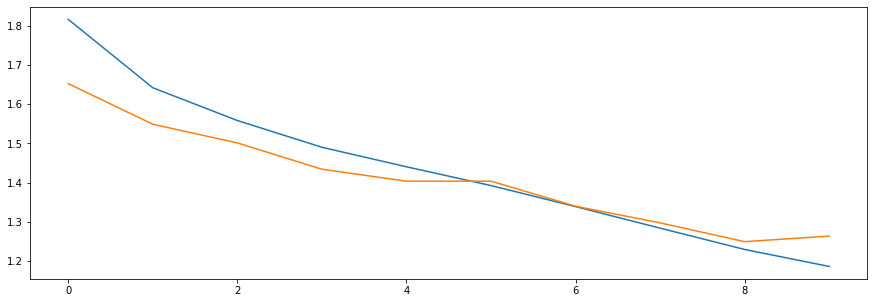

In [49]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

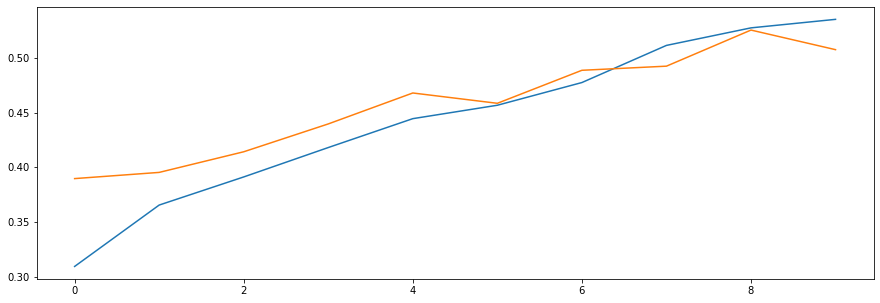

In [50]:
plt.figure(figsize=(15,5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])